In [1]:
%matplotlib inline
# imports basicos
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from pandas.io.pytables import HDFStore
from IPython.core.pylabtools import figsize, getfigs

# Scikit
import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import linear_model, cross_validation, grid_search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, average_precision_score

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.neural_network import BernoulliRBM

from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#from sklearn.preprocessing import Imputer
from matplotlib.colors import ListedColormap

# ggplot
# from ggplot import *

# Deixa os graficos com uma cara mais bonita
pd.set_option('display.mpl_style', 'default')
figsize(18, 5)
pd.set_option('display.max_columns',300)
pd.set_option('display.width', 4000)


/Users/developer/anaconda2/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/developer/anaconda2/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)
/Users/developer/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


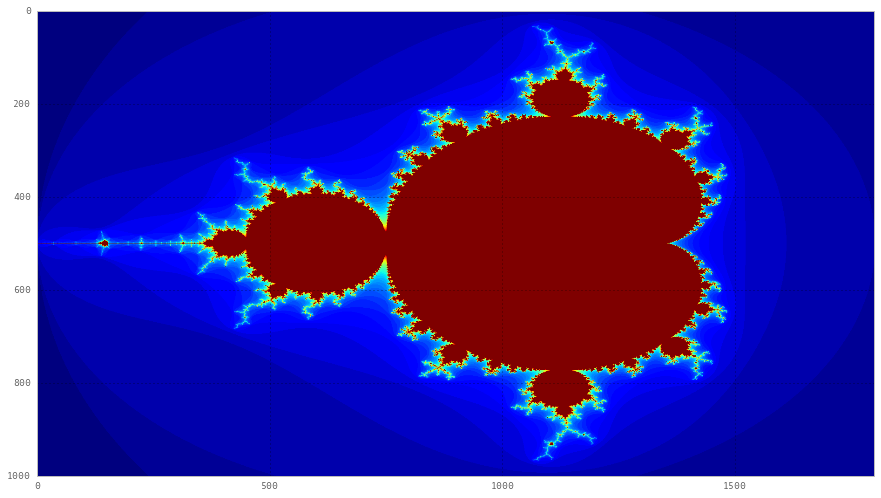

In [16]:
import numpy as np

def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x,y)
    z = 0j
    for i in range(max_iters):
        z = z*z + c
        if z.real * z.real + z.imag * z.imag >= 4:
            return 255 * i // max_iters

    return 255

def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((1000, 1800), dtype=np.uint8)
create_fractal(-2.0, 1.0, -1.2, 1.2, image, 50)


plt.figure()
plt.imshow(image)
plt.set_cmap('jet')
plt.show()

In [13]:
help(plt.colormaps)

Help on function colormaps in module matplotlib.pyplot:

colormaps()
    Matplotlib provides a number of colormaps, and others can be added using
    :func:`~matplotlib.cm.register_cmap`.  This function documents the built-in
    colormaps, and will also return a list of all registered colormaps if called.
    
    You can set the colormap for an image, pcolor, scatter, etc,
    using a keyword argument::
    
      imshow(X, cmap=cm.hot)
    
    or using the :func:`set_cmap` function::
    
      imshow(X)
      pyplot.set_cmap('hot')
      pyplot.set_cmap('jet')
    
    In interactive mode, :func:`set_cmap` will update the colormap post-hoc,
    allowing you to see which one works best for your data.
    
    All built-in colormaps can be reversed by appending ``_r``: For instance,
    ``gray_r`` is the reverse of ``gray``.
    
    There are several common color schemes used in visualization:
    
    Sequential schemes
      for unipolar data that progresses from low to high
    

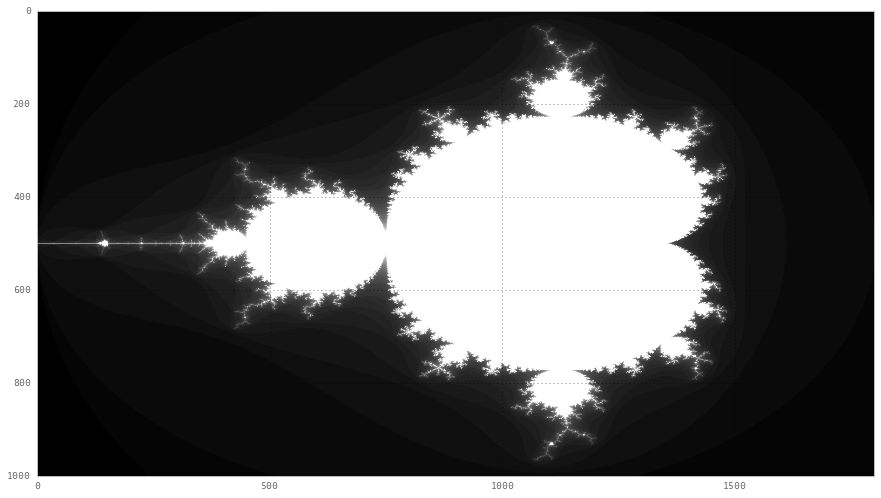

In [15]:
figsize(15, 15)
plt.imshow(image)
plt.gray()
plt.show()

# Chaos

In [1]:
def f(xi,mul):
    x = [xi]
    for _ in range(100):
        a = x[-1]
        x.append(mul*a*(1-a))
    return x

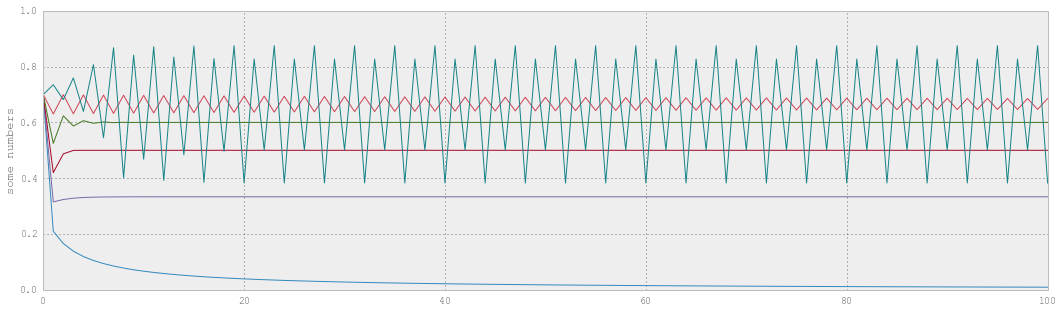

In [3]:
plt.plot(f(0.7,1))
plt.plot(f(0.7,1.5))
plt.plot(f(0.7,2))
plt.plot(f(0.7,2.5))
plt.plot(f(0.7,3))
plt.plot(f(0.7,3.5))
plt.ylabel('some numbers')
plt.axis([0, 100, 0, 1])
plt.show()

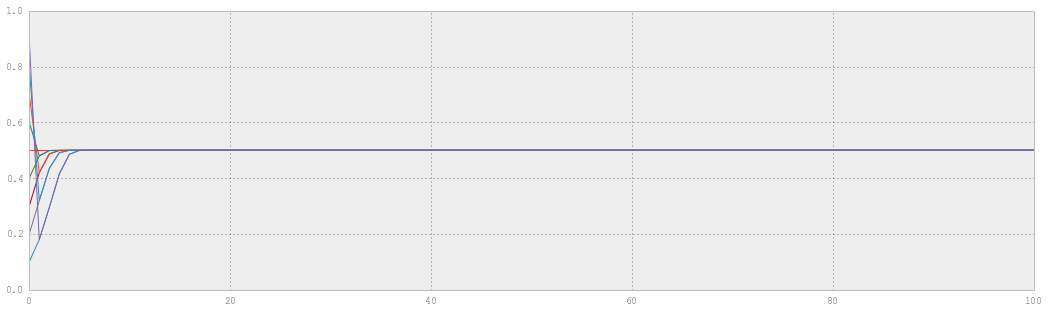

In [4]:
plt.plot(f(0.1,2))
plt.plot(f(0.2,2))
plt.plot(f(0.3,2))
plt.plot(f(0.4,2))
plt.plot(f(0.5,2))
plt.plot(f(0.6,2))
plt.plot(f(0.7,2))
plt.plot(f(0.8,2))
plt.plot(f(0.9,2))
plt.axis([0, 100, 0, 1])
plt.show()

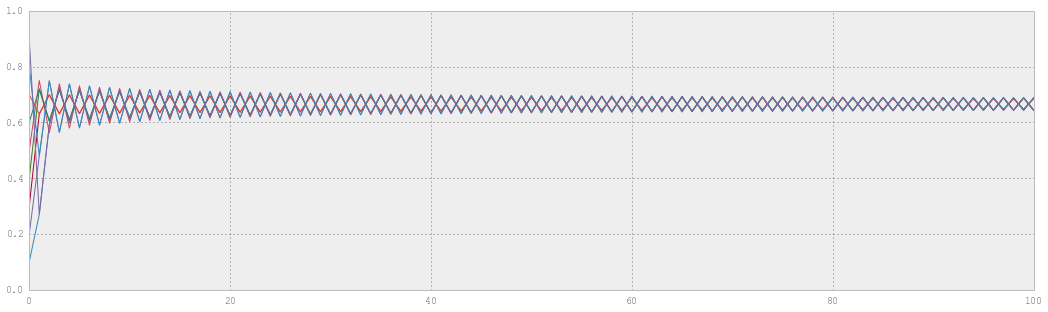

In [5]:
plt.plot(f(0.1,3))
plt.plot(f(0.2,3))
plt.plot(f(0.3,3))
plt.plot(f(0.4,3))
plt.plot(f(0.5,3))
plt.plot(f(0.6,3))
plt.plot(f(0.7,3))
plt.plot(f(0.8,3))
plt.plot(f(0.9,3))
plt.axis([0, 100, 0, 1])
plt.show()

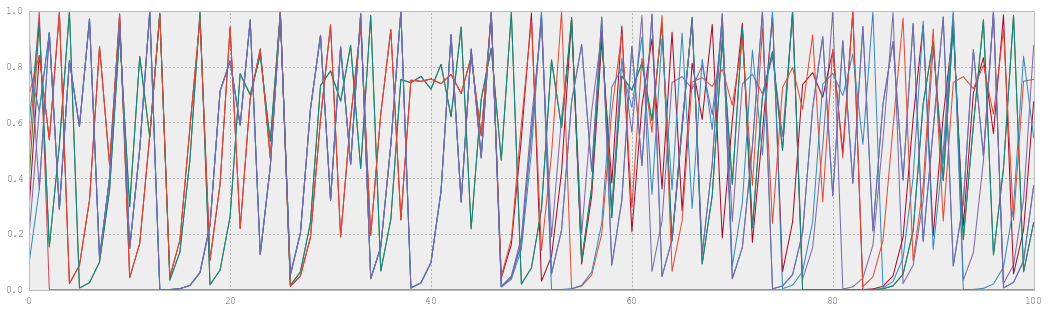

In [6]:
plt.plot(f(0.1,4))
plt.plot(f(0.2,4))
plt.plot(f(0.3,4))
plt.plot(f(0.4,4))
plt.plot(f(0.5,4))
plt.plot(f(0.6,4))
plt.plot(f(0.7,4))
plt.plot(f(0.8,4))
plt.plot(f(0.9,4))
plt.axis([0, 100, 0, 1])
plt.show()

## A very small change in the initial condition creates a huge difference later

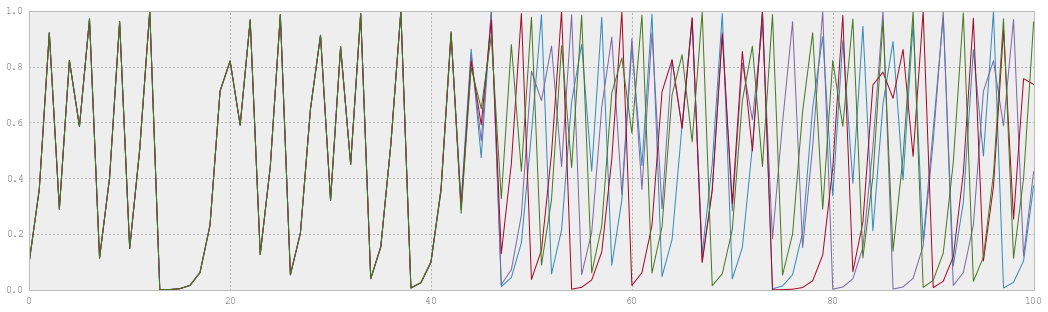

In [7]:
plt.plot(f(0.100000000000000,4))
plt.plot(f(0.100000000000001,4))
plt.plot(f(0.100000000000002,4))
plt.plot(f(0.100000000000003,4))
plt.axis([0, 100, 0, 1])
plt.show()
